In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('speeddating.csv', encoding='utf-8')

In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load data
df = pd.read_csv('speeddating.csv', encoding='utf-8')

# drop features with low data availability
low_data_features = ['expected_num_interested_in_me', 'expected_num_matches', 'shared_interests_o',
                     'shared_interests_partner', 'ambitous_o', 'ambition_partner', 'met', 'funny_o',
                     'funny_partner', 'guess_prob_liked', 'intelligence_o', 'intelligence_partner', 'sinsere_o',
                     'sincere_partner', 'like', 'attractive_o', 'attractive_partner', 'interests_correlate',
                     'pref_o_shared_interests', 'shared_interests_important', 'pref_o_ambitious', 'attractive',
                     'ambition', 'funny', 'intelligence', 'sincere', 'age_o', 'expected_happy_with_sd_people',
                     'ambtition_important', 'pref_o_funny']
df.drop(columns=low_data_features, inplace=True)

# drop rows with missing values
df = df.dropna()

y = df.pop('match').values

df = pd.get_dummies(df)

# extract target variable


# scale the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

# split data


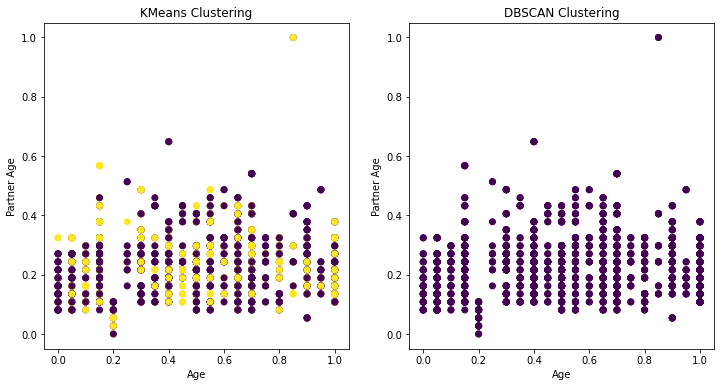

In [51]:
from sklearn.cluster import KMeans, DBSCAN

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_test)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=3)
y_dbscan = dbscan.fit_predict(X_test)

# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Partner Age')
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Partner Age')
plt.show()
